# Decision Tree

Here we have performed decision tree algorithm for the iris dataset where we have trained our dataset to predict the correct category of the species by providing the valid inputs.

In the end we will give a sample input and tested the output prediction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head() #We will have a look at our dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = data.drop("Id", axis=1)

In [5]:
#We will first of all see the summary of the data set
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can ignore the Id column and have a look at the rest of the variable. We can see that the sepal length is more than the petal and same is with width. The standard deviation of the petal length is highest.

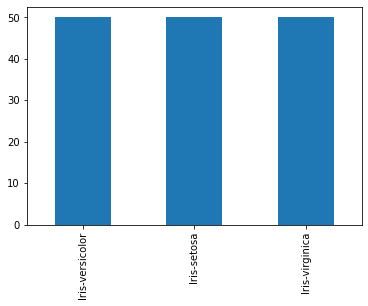

In [6]:
data.Species.value_counts().plot.bar()

We can see that each category of the dataset is having same freuency. So the dataset is very well balanced.

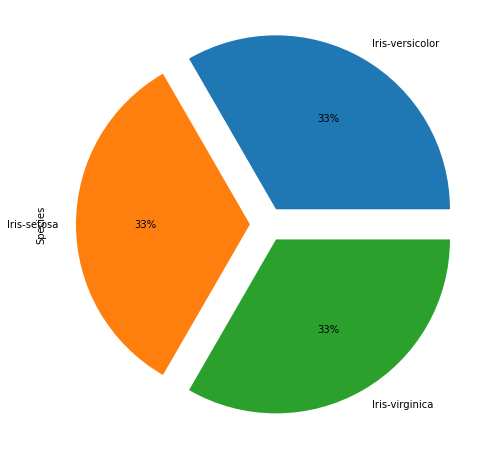

In [7]:
data.Species.value_counts().plot.pie(explode = [0.1,0.1,0.1], figsize=(8,8),autopct='%1.1d%%')

All the categories are having same number of frequency

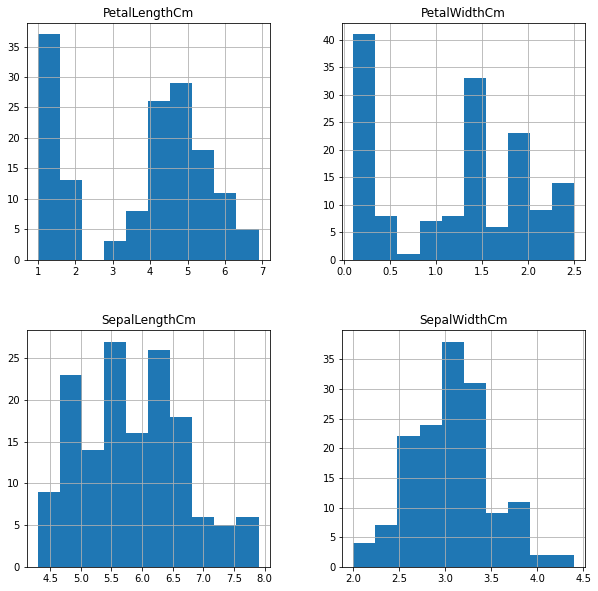

In [8]:
#We will see the plot of all the variables now
data.hist(figsize=(10,10))
plt.show()

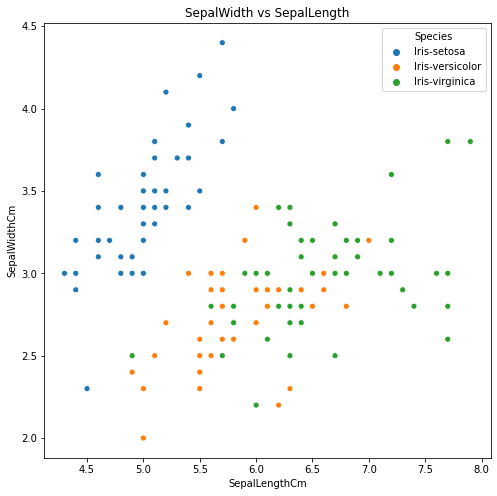

In [9]:
#WE will see the relationship between Sepalwidth and SepalLength with respect to Species
f, ax = plt.subplots(figsize = (8,8))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data ,hue='Species',ax=ax)
plt.title("SepalWidth vs SepalLength")
plt.show()

We can see that each colour is showing each category of Species. Iris-setosa is showing a positive linear relation between SepalWidth and SepalLength. While rest two cateogries also show the good relationship between sepalwidth and sepallength.

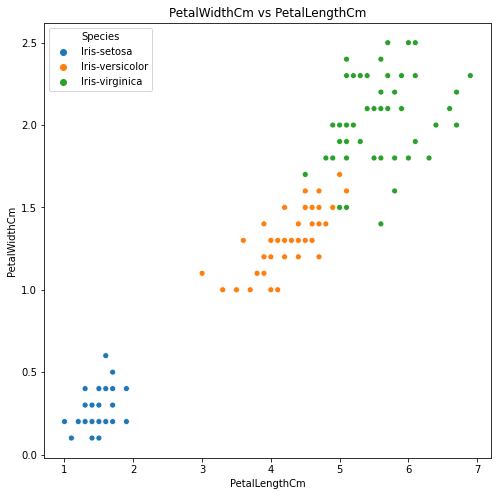

In [10]:
#WE will see the relationship between PetalWidthCm and PetalLengthCm with respect to Species
f, ax = plt.subplots(figsize = (8,8))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=data ,hue='Species',ax=ax)
plt.title("PetalWidthCm vs PetalLengthCm")
plt.show()

Length of the petal and width is very less for the Iris-setosa and for Iris-virginica is highest.

Since the length of the petal and width gives a overall strong positive relationship over the sepalwidth and sepallength. So petal length and width will give more accurate prediction as comparison to the sepal length and width.

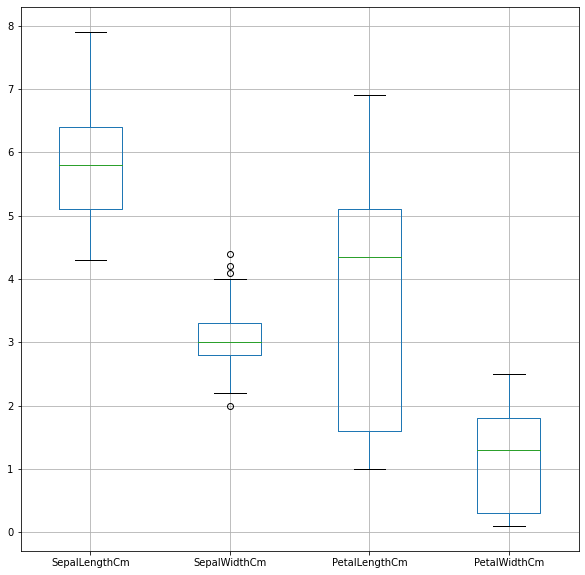

In [11]:
data.boxplot(figsize=(10,10))

Only SepalWidthCm is having the outliers among all three.

SepalLengthCm       AxesSubplot(0.125,0.536818;0.352273x0.343182)
SepalWidthCm     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
PetalLengthCm          AxesSubplot(0.125,0.125;0.352273x0.343182)
PetalWidthCm        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

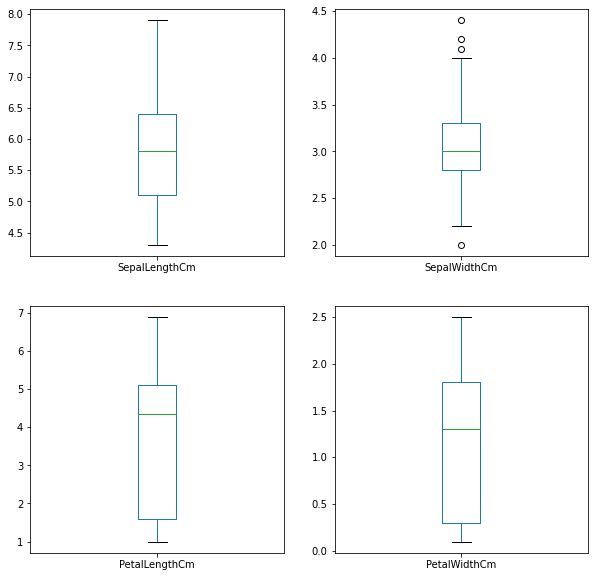

In [12]:
data.plot(kind='box',subplots=True, layout=(2,2), figsize=(10,10),sharex=False, sharey= False)

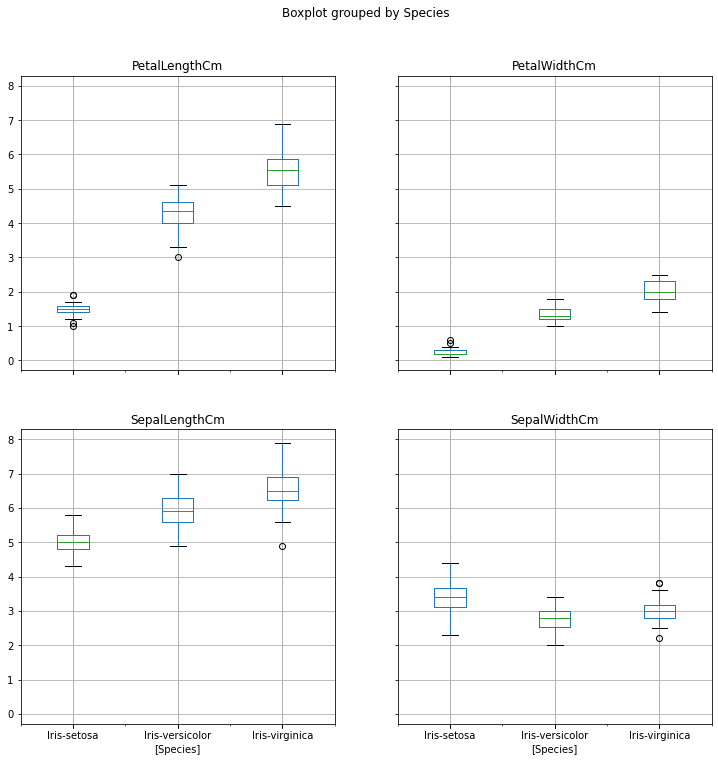

In [13]:
data.boxplot(by="Species",figsize=(12,12))
plt.show()

Now we can check the outliers according to the categories of the sepeies. Iris-versicolor is having only one outlier. 

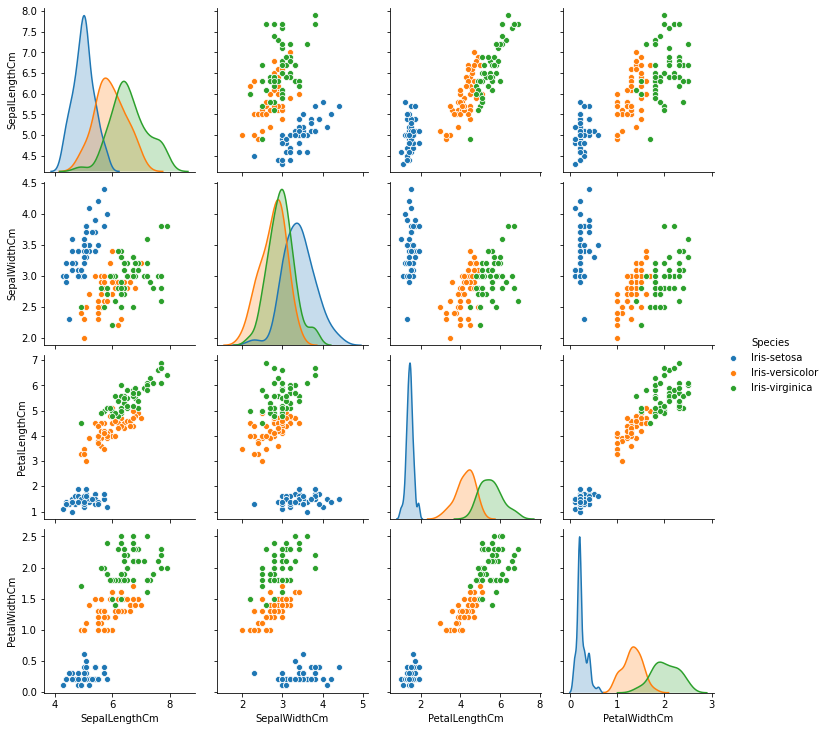

In [14]:
sns.pairplot(data, hue= 'Species')

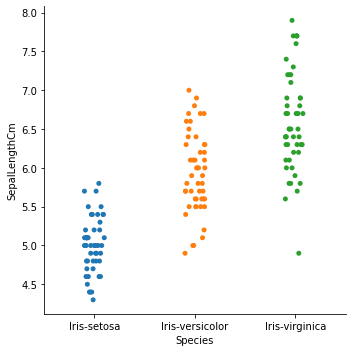

In [15]:
sns.catplot(y="SepalLengthCm", x ="Species",data=data)

Iris-setosa is not having much of the SepalLength, while Iris=svirginica category is having much more lengt. 

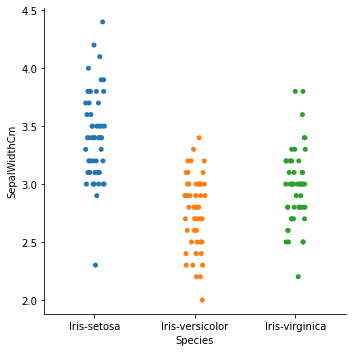

In [16]:
sns.catplot(y="SepalWidthCm", x ="Species",data=data)

Iris-setosa is having higher width then comparison to the other two.

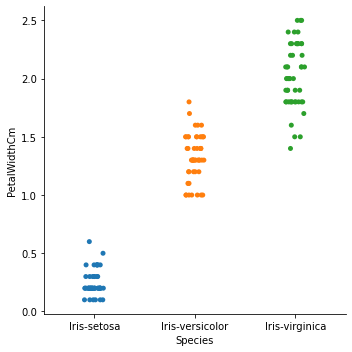

In [17]:
sns.catplot(y="PetalWidthCm", x ="Species",data=data)

PetalWidth of the Iris-setosa is less than comparison to the other two categories.

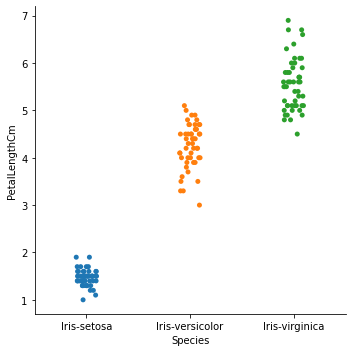

In [18]:
sns.catplot(y="PetalLengthCm", x ="Species",data=data)

PetalLength of the Iris-setosa is very less in comparison to other. 

So, we can say that Iris-setosa is a small flower among all the three of them.

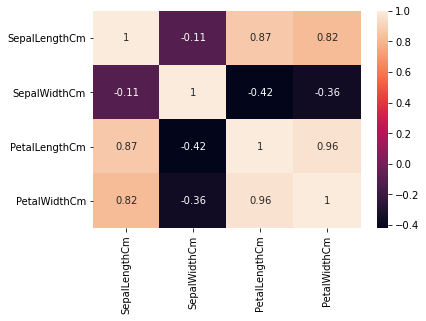

In [19]:
fig=plt.figure()
sns.heatmap(data.corr(),annot= True)
plt.show()

SepalLength and PetalLength are highly correlated and SepalLength nd PetalWidth are also highly correlated among themselves and PetalLength and PetalWidth are also highly correlated among themselves.

## Spliting the dataset 

In [20]:
X = data.drop("Species",axis=1)
y = data['Species']

In [21]:
#We will import the important libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [22]:
LE=LabelEncoder()
y=LE.fit_transform(y)

In [23]:
#WE will now split the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [24]:
#We will fit the model and check for the accuracy
model=DecisionTreeClassifier()
model.fit(X_train,y_train)#Fitting the model
pred=model.predict(X_test)#prediction
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [25]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [26]:
print("Confusion Matrix for the data is:\n",confusion_matrix(pred,y_test))
print("=================================================================")
print("Classification Report for the data is:\n",classification_report(pred,y_test))
print("=================================================================")

# Accuracy Score
print("Accuracy Score for the prediction:\n",accuracy_score(pred,y_test))

Confusion Matrix for the data is:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Classification Report for the data is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score for the prediction:
 1.0


### The model is working perfectly with an accuracy of 1.0 and Good Recall and Precision.

# Now we will check whether our model is working correct or now by giving a sample input


In [27]:
input_given = np.array([[4.6,3.6,1.3,0.2]])
output_given = np.array([0])
prediction=model.predict(input_given)
print(f"We have provided the output as {output_given}.")
print(f"The prediction our model gave is {prediction}")

We have provided the output as [0].
The prediction our model gave is [0]


### So our model is predicting correct category.